# visualise DARS

In [2]:
import glob
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [3]:
dar_path_dict_dict = {
    y: {
        "_".join(z.split("/")[-1].split("__")[-2].split("_VS")[0].split("_")[1:]): z
        for z in sorted(
            glob.glob(
                "downstream_analysis_male_female_countfair/DARs/*"
                + y
                + "*DARs_1-0xfc.bed"
            )
        )
    }
    for y in [
        x.split("/")[-1].split("_samp")[0].split("__")[1].split("_")[0]
        for x in sorted(
            glob.glob(
                "downstream_analysis_male_female_countfair/DARs/merged_male_female_cellcountfair/*"
            )
        )
    ]
}
dar_path_dict_dict

{'10xmultiome': {'sampleA_B_cell': 'downstream_analysis_male_female_countfair/DARs/merged_male_female_cellcountfair__10xmultiome_sampleA_B_cell_VS_10xmultiome_sampleB_B_cell__DARs_1-0xfc.bed',
  'sampleA_CD14+_monocyte': 'downstream_analysis_male_female_countfair/DARs/merged_male_female_cellcountfair__10xmultiome_sampleA_CD14+_monocyte_VS_10xmultiome_sampleB_CD14+_monocyte__DARs_1-0xfc.bed',
  'sampleA_CD16+_monocyte': 'downstream_analysis_male_female_countfair/DARs/merged_male_female_cellcountfair__10xmultiome_sampleA_CD16+_monocyte_VS_10xmultiome_sampleB_CD16+_monocyte__DARs_1-0xfc.bed',
  'sampleA_CD4+_T_cell': 'downstream_analysis_male_female_countfair/DARs/merged_male_female_cellcountfair__10xmultiome_sampleA_CD4+_T_cell_VS_10xmultiome_sampleB_CD4+_T_cell__DARs_1-0xfc.bed',
  'sampleA_Cytotoxic_T_cell': 'downstream_analysis_male_female_countfair/DARs/merged_male_female_cellcountfair__10xmultiome_sampleA_Cytotoxic_T_cell_VS_10xmultiome_sampleB_Cytotoxic_T_cell__DARs_1-0xfc.bed',
  

In [4]:
import numpy as np

In [5]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        # if "Cytotoxic" in cell_type or "B_cell" in cell_type:
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:200]])
        df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
        df_lens.at[sample, cell_type] = len(df[df[4] > np.log2(1.2)])
        print(2 ** min(df[4]))

10xmultiome
sampleA_B_cell
1.0094663995355238
sampleA_CD14+_monocyte
1.0004638640496268
sampleA_CD16+_monocyte
1.0359709890712347
sampleA_CD4+_T_cell
1.005628239857312
sampleA_Cytotoxic_T_cell
1.0000032111195183
sampleA_Natural_killer_cell
1.0080052180428658
sampleB_B_cell
1.000796415317929
sampleB_CD14+_monocyte
1.0011143123862127
sampleB_CD16+_monocyte
1.0223456068789325
sampleB_CD4+_T_cell
1.0053488792149794
sampleB_Cytotoxic_T_cell
1.0000689225844324
sampleB_Natural_killer_cell
1.013543946209961
10xv11
sampleA_B_cell
1.0003935268006898
sampleA_CD14+_monocyte
1.005317698490578
sampleA_CD4+_T_cell
1.0010281934117324
sampleA_Cytotoxic_T_cell
1.0000514598427228
sampleA_Dendritic_cell
1.0771269348344303
sampleA_Natural_killer_cell
1.0113587884489426
sampleB_B_cell
1.0001165311363798
sampleB_CD14+_monocyte
1.0054833213434704
sampleB_CD4+_T_cell
1.0002792807021754
sampleB_Cytotoxic_T_cell
1.0000030044528057
sampleB_Dendritic_cell
1.2064244542771354
sampleB_Natural_killer_cell
1.0127587447

In [6]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [7]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample
0,chr8,141380608,141381108,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.969068,.,0.017024,10xmultiome
1,chr16,11219110,11219610,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.901704,.,0.001341,10xmultiome
2,chr11,75777434,75777934,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.871713,.,0.000083,10xmultiome
3,chr22,37731743,37732243,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.857756,.,0.005415,10xmultiome
4,chr3,122085675,122086175,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.847473,.,0.041991,10xmultiome
...,...,...,...,...,...,...,...,...
195,chr6,159701254,159701754,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.507375,.,0.026579,s3atac
196,chr17,64990807,64991307,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.506885,.,0.046688,s3atac
197,chr10,102738720,102739220,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.506749,.,0.000002,s3atac
198,chr17,77308741,77309241,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.506459,.,0.006755,s3atac


In [8]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [9]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type                                                                   
10xmultiome  10xmultiome_sampleA_B_cell_VS_10xmultiome_sampleB_B_cell                        10000
             10xmultiome_sampleA_CD14+_monocyte_VS_10xmultiome_sampleB_CD14+_monocyte        10000
             10xmultiome_sampleA_CD4+_T_cell_VS_10xmultiome_sampleB_CD4+_T_cell              10000
             10xmultiome_sampleA_Cytotoxic_T_cell_VS_10xmultiome_sampleB_Cytotoxic_T_cell    10000
             10xmultiome_sampleB_CD14+_monocyte_VS_10xmultiome_sampleA_CD14+_monocyte        10000
                                                                                             ...  
s3atac       s3atac_sampleB_CD4+_T_cell_VS_s3atac_sampleA_CD4+_T_cell                         7836
             s3atac_sampleA_CD14+_monocyte_VS_s3atac_sampleB_CD14+_monocyte                   7358
             s3atac_sampleA_B_cell_VS_s3atac_sampleB_B_cell                                   2476
             s3atac

In [10]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

# pivoted heatmap

In [11]:
male_female_alias_dict = {
    x.split("_VS")[0]: x.replace("sampleA", "\u2642")
    .replace("sampleB", "\u2640")
    .split("_VS_")[0]
    .replace("_", " ")
    .replace("CD4+", "Naive")
    + "s"
    for x in [
        "sampleA_B_cell_VS_sampleB_B_cell",
        "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
        "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
        "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte",
        "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
        "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
        "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
        "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
        "sampleB_B_cell_VS_sampleA_B_cell",
        "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
        "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
        "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
        "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
        "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
    ]
}
male_female_alias_dict

{'sampleA_B_cell': '♂ B cells',
 'sampleA_CD14+_monocyte': '♂ CD14+ monocytes',
 'sampleA_CD16+_monocyte': '♂ CD16+ monocytes',
 'sampleB_CD16+_monocyte': '♀ CD16+ monocytes',
 'sampleA_CD4+_T_cell': '♂ Naive T cells',
 'sampleA_Cytotoxic_T_cell': '♂ Cytotoxic T cells',
 'sampleA_Dendritic_cell': '♂ Dendritic cells',
 'sampleA_Natural_killer_cell': '♂ Natural killer cells',
 'sampleB_B_cell': '♀ B cells',
 'sampleB_CD14+_monocyte': '♀ CD14+ monocytes',
 'sampleB_CD4+_T_cell': '♀ Naive T cells',
 'sampleB_Cytotoxic_T_cell': '♀ Cytotoxic T cells',
 'sampleB_Dendritic_cell': '♀ Dendritic cells',
 'sampleB_Natural_killer_cell': '♀ Natural killer cells'}

In [12]:
sorted(
    [
        x.replace("sampleA", "\u2642")
        .replace("sampleB", "\u2640")
        .split("_VS_")[0]
        .replace("_", " ")
        .replace("CD4+", "Naive")
        + "s"
        for x in [
            "sampleA_B_cell_VS_sampleB_B_cell",
            "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
            "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
            "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
            "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
            "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
            "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
            "sampleB_B_cell_VS_sampleA_B_cell",
            "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
            "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
            "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
            "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
            "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
        ]
    ]
)

['♀ B cells',
 '♀ CD14+ monocytes',
 '♀ Cytotoxic T cells',
 '♀ Dendritic cells',
 '♀ Naive T cells',
 '♀ Natural killer cells',
 '♂ B cells',
 '♂ CD14+ monocytes',
 '♂ CD16+ monocytes',
 '♂ Cytotoxic T cells',
 '♂ Dendritic cells',
 '♂ Naive T cells',
 '♂ Natural killer cells']

In [13]:
[
    "♀ CD14+ monocytes",
    "♂ CD14+ monocytes",
    "♂ CD16+ monocytes",
    "♀ Dendritic cells",
    "♂ Dendritic cells",
    "♀ Naive T cells",
    "♂ Naive T cells",
    "♀ Natural killer cells",
    "♂ Natural killer cells",
]

['♀ CD14+ monocytes',
 '♂ CD14+ monocytes',
 '♂ CD16+ monocytes',
 '♀ Dendritic cells',
 '♂ Dendritic cells',
 '♀ Naive T cells',
 '♂ Naive T cells',
 '♀ Natural killer cells',
 '♂ Natural killer cells']

In [14]:
male_female_order = [
    "\u2640 B cells",
    "\u2642 B cells",
    "\u2640 CD14+ monocytes",
    "\u2642 CD14+ monocytes",
    "\u2642 CD16+ monocytes",
    "\u2640 Cytotoxic T cells",
    "\u2642 Cytotoxic T cells",
    "\u2640 Dendritic cells",
    # "\u2642 Dendritic cells",
    "\u2640 Naive T cells",
    "\u2642 Naive T cells",
    "\u2640 Natural killer cells",
    "\u2642 Natural killer cells",
]

In [15]:
# male_female_order = [
#     "\u2640 B cells",
#     "\u2642 B cells",
#     "\u2640 Cytotoxic T cells",
#     "\u2642 Cytotoxic T cells",
# ]

In [16]:
df_merged["cell_type_specific"] = [
    "_".join(x.split("_VS_")[0].split("_")[1:]) for x in df_merged["cell_type"]
]

In [17]:
df_merged["cell_type_specific"].unique()

array(['sampleA_B_cell', 'sampleA_CD14+_monocyte',
       'sampleA_CD16+_monocyte', 'sampleA_CD4+_T_cell',
       'sampleA_Cytotoxic_T_cell', 'sampleA_Natural_killer_cell',
       'sampleB_B_cell', 'sampleB_CD14+_monocyte',
       'sampleB_CD16+_monocyte', 'sampleB_CD4+_T_cell',
       'sampleB_Cytotoxic_T_cell', 'sampleB_Natural_killer_cell',
       'sampleA_Dendritic_cell', 'sampleB_Dendritic_cell'], dtype=object)

In [18]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type_specific", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [male_female_alias_dict[x] for x in df_merged_pivot.columns]
df_merged_pivot = df_merged_pivot[male_female_order]

df_merged_pivot

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,0.933712,1.248917,0.351550,0.829896,0.336836,2.063364,0.744469,0.151019,0.419613,0.834187,0.361073,0.998999
10x v1.1,0.553282,1.067494,0.257615,0.479353,NaN,1.347114,0.603458,0.379098,0.376446,0.395813,0.314411,0.288569
10x v2,0.434368,1.456860,0.428286,1.030265,0.433375,1.284421,0.530352,NaN,0.389803,0.734341,0.315574,0.598940
10x Multiome,0.483545,0.700222,0.378435,0.768581,0.129979,1.340477,0.666993,NaN,0.305296,0.511896,0.067411,0.245442
mtscATAC-seq,0.724826,0.901006,0.383556,0.745580,0.083411,0.591011,0.720211,0.383082,0.526495,0.551615,0.172270,0.199048
ddSEQ SureCell,0.194683,1.281845,0.432378,0.639891,0.356439,0.980974,2.346385,NaN,0.778228,0.497262,NaN,NaN
s3-ATAC,0.181615,0.627822,0.358834,0.171013,NaN,0.527205,0.645637,NaN,0.402711,0.127494,NaN,NaN
HyDrop,0.300413,0.835860,0.716061,0.714832,0.077308,0.624643,0.782758,NaN,0.457516,0.598148,0.329990,0.462371


### in real values

In [19]:
from sklearn.preprocessing import minmax_scale

In [20]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

In [21]:
df_merged_pivot_abs_normalized

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,1.000000,0.692906,0.179856,0.711046,0.704055,1.000000,0.063461,0.00000,0.212572,1.000000,1.000000,1.000000
10x v1.1,0.429451,0.458849,0.000000,0.292695,NaN,0.402741,0.020618,0.98144,0.130317,0.323394,0.827191,0.086388
10x v2,0.279842,1.000000,0.335726,1.000000,1.000000,0.363236,0.000000,NaN,0.155506,0.827340,0.831431,0.431027
10x Multiome,0.340222,0.066278,0.233526,0.630347,0.132830,0.398477,0.039404,NaN,0.000000,0.483055,0.000000,0.044100
mtscATAC-seq,0.668205,0.268477,0.243862,0.600949,0.015145,0.023797,0.055790,1.00000,0.427146,0.540701,0.333954,0.000000
ddSEQ SureCell,0.013299,0.738635,0.344272,0.471729,0.762557,0.194512,1.000000,NaN,1.000000,0.462212,NaN,NaN
s3-ATAC,0.000000,0.000000,0.194298,0.000000,NaN,0.000000,0.032997,NaN,0.180072,0.000000,NaN,NaN
HyDrop,0.125439,0.199764,1.000000,0.562374,0.000000,0.036771,0.075836,NaN,0.286854,0.610287,0.884268,0.270214


In [22]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,cell_type_specific
0,chr8,141380608,141381108,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.969068,.,0.017024,10xmultiome,10xmultiome,sampleA_B_cell
1,chr16,11219110,11219610,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.901704,.,0.001341,10xmultiome,10xmultiome,sampleA_B_cell
2,chr11,75777434,75777934,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.871713,.,0.000083,10xmultiome,10xmultiome,sampleA_B_cell
3,chr22,37731743,37732243,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.857756,.,0.005415,10xmultiome,10xmultiome,sampleA_B_cell
4,chr3,122085675,122086175,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.847473,.,0.041991,10xmultiome,10xmultiome,sampleA_B_cell
...,...,...,...,...,...,...,...,...,...,...
195,chr6,159701254,159701754,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.507375,.,0.026579,s3atac,s3atac,sampleB_Cytotoxic_T_cell
196,chr17,64990807,64991307,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.506885,.,0.046688,s3atac,s3atac,sampleB_Cytotoxic_T_cell
197,chr10,102738720,102739220,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.506749,.,0.000002,s3atac,s3atac,sampleB_Cytotoxic_T_cell
198,chr17,77308741,77309241,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.506459,.,0.006755,s3atac,s3atac,sampleB_Cytotoxic_T_cell


In [23]:
import matplotlib.pyplot as plt

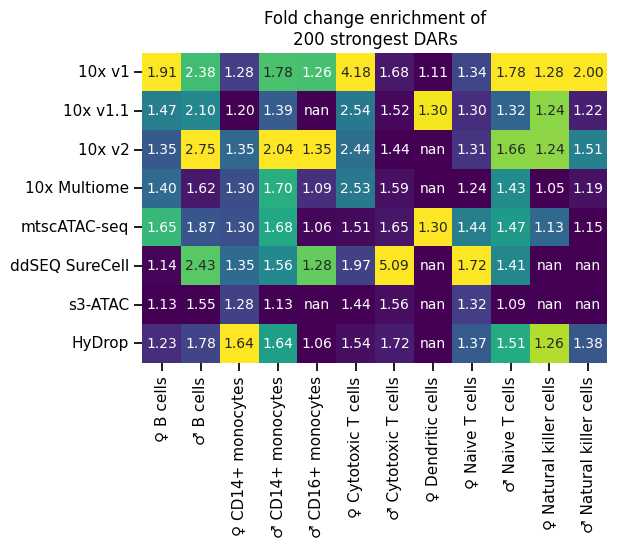

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data=df_merged_pivot_abs_normalized.fillna(value=0),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)
# plt.xticks(rotation=45, ha="right")

# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
plt.title("Fold change enrichment of\n200 strongest DARs")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top2k_DARs_fc_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top2k_DARs_fc_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# n_DARs

In [25]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]

In [26]:
df_lens = df_lens.loc[tech_order]

df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

df_lens.columns = [male_female_alias_dict[x] for x in df_lens.columns]
df_lens = df_lens[male_female_order]

df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))

In [27]:
df_lens

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,737.0,6028.0,151.0,3375.0,174.0,22034.0,7392.0,6.0,194.0,4514.0,140.0,1659.0
10x v1.1,406.0,5498.0,91.0,936.0,NaN,26196.0,8183.0,3.0,278.0,1108.0,195.0,121.0
10x v2,432.0,9271.0,174.0,3116.0,1145.0,8288.0,4696.0,NaN,311.0,5355.0,178.0,1110.0
10x Multiome,405.0,3670.0,190.0,1418.0,5.0,26362.0,5655.0,NaN,157.0,1988.0,0.0,90.0
mtscATAC-seq,2306.0,2770.0,256.0,2798.0,0.0,23698.0,5216.0,201.0,885.0,1284.0,19.0,31.0
ddSEQ SureCell,74.0,6381.0,545.0,835.0,201.0,4103.0,9542.0,NaN,3481.0,658.0,NaN,NaN
s3-ATAC,12.0,646.0,483.0,0.0,NaN,14946.0,2761.0,NaN,1004.0,1.0,NaN,NaN
HyDrop,149.0,4989.0,2446.0,1965.0,0.0,24182.0,6177.0,NaN,966.0,2265.0,234.0,599.0


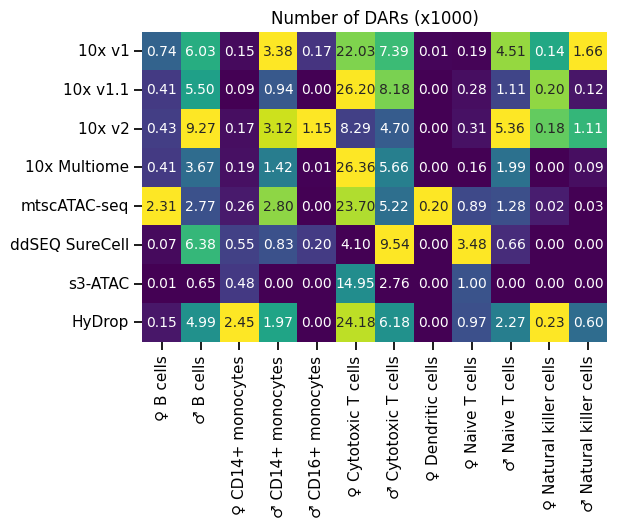

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data=df_lens_normalized.fillna(value=int(0)),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=(df_lens / 1000).fillna(value=int(0)),
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)


# plt.xticks(rotation=45, ha="right")
plt.title("Number of DARs (x1000)")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_ndars_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_ndars_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# Select the most pronounced cell types

In [29]:
male_female_order = [
    "\u2640 B cells",
    "\u2642 B cells",
    # "\u2640 CD14+ monocytes",
    # "\u2642 CD14+ monocytes",
    # "\u2642 CD16+ monocytes",
    "\u2640 Cytotoxic T cells",
    "\u2642 Cytotoxic T cells",
    # "\u2640 Dendritic cells",
    # "\u2642 Dendritic cells",
    "\u2640 Naive T cells",
    "\u2642 Naive T cells",
    # "\u2640 Natural killer cells",
    # "\u2642 Natural killer cells",
]

In [30]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        # if "Cytotoxic" in cell_type or "B_cell" in cell_type:
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:200]])
        df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
        df_lens.at[sample, cell_type] = len(df[df[4] > np.log2(1.2)])
        print(2 ** min(df[4]))

10xmultiome
sampleA_B_cell
1.0094663995355238
sampleA_CD14+_monocyte
1.0004638640496268
sampleA_CD16+_monocyte
1.0359709890712347
sampleA_CD4+_T_cell
1.005628239857312
sampleA_Cytotoxic_T_cell
1.0000032111195183
sampleA_Natural_killer_cell
1.0080052180428658
sampleB_B_cell
1.000796415317929
sampleB_CD14+_monocyte
1.0011143123862127
sampleB_CD16+_monocyte
1.0223456068789325
sampleB_CD4+_T_cell
1.0053488792149794
sampleB_Cytotoxic_T_cell
1.0000689225844324
sampleB_Natural_killer_cell
1.013543946209961
10xv11
sampleA_B_cell
1.0003935268006898
sampleA_CD14+_monocyte
1.005317698490578
sampleA_CD4+_T_cell
1.0010281934117324
sampleA_Cytotoxic_T_cell
1.0000514598427228
sampleA_Dendritic_cell
1.0771269348344303
sampleA_Natural_killer_cell
1.0113587884489426
sampleB_B_cell
1.0001165311363798
sampleB_CD14+_monocyte
1.0054833213434704
sampleB_CD4+_T_cell
1.0002792807021754
sampleB_Cytotoxic_T_cell
1.0000030044528057
sampleB_Dendritic_cell
1.2064244542771354
sampleB_Natural_killer_cell
1.0127587447

In [31]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [32]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [33]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type                                                                   
10xmultiome  10xmultiome_sampleA_B_cell_VS_10xmultiome_sampleB_B_cell                        10000
             10xmultiome_sampleA_CD14+_monocyte_VS_10xmultiome_sampleB_CD14+_monocyte        10000
             10xmultiome_sampleA_CD4+_T_cell_VS_10xmultiome_sampleB_CD4+_T_cell              10000
             10xmultiome_sampleA_Cytotoxic_T_cell_VS_10xmultiome_sampleB_Cytotoxic_T_cell    10000
             10xmultiome_sampleB_CD14+_monocyte_VS_10xmultiome_sampleA_CD14+_monocyte        10000
                                                                                             ...  
s3atac       s3atac_sampleB_CD4+_T_cell_VS_s3atac_sampleA_CD4+_T_cell                         7836
             s3atac_sampleA_CD14+_monocyte_VS_s3atac_sampleB_CD14+_monocyte                   7358
             s3atac_sampleA_B_cell_VS_s3atac_sampleB_B_cell                                   2476
             s3atac

# pivoted heatmap

In [34]:
male_female_alias_dict = {
    x.split("_VS")[0]: x.replace("sampleA", "\u2642")
    .replace("sampleB", "\u2640")
    .split("_VS_")[0]
    .replace("_", " ")
    .replace("CD4+", "Naive")
    + "s"
    for x in [
        "sampleA_B_cell_VS_sampleB_B_cell",
        "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
        "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
        "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte",
        "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
        "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
        "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
        "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
        "sampleB_B_cell_VS_sampleA_B_cell",
        "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
        "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
        "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
        "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
        "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
    ]
}
male_female_alias_dict

{'sampleA_B_cell': '♂ B cells',
 'sampleA_CD14+_monocyte': '♂ CD14+ monocytes',
 'sampleA_CD16+_monocyte': '♂ CD16+ monocytes',
 'sampleB_CD16+_monocyte': '♀ CD16+ monocytes',
 'sampleA_CD4+_T_cell': '♂ Naive T cells',
 'sampleA_Cytotoxic_T_cell': '♂ Cytotoxic T cells',
 'sampleA_Dendritic_cell': '♂ Dendritic cells',
 'sampleA_Natural_killer_cell': '♂ Natural killer cells',
 'sampleB_B_cell': '♀ B cells',
 'sampleB_CD14+_monocyte': '♀ CD14+ monocytes',
 'sampleB_CD4+_T_cell': '♀ Naive T cells',
 'sampleB_Cytotoxic_T_cell': '♀ Cytotoxic T cells',
 'sampleB_Dendritic_cell': '♀ Dendritic cells',
 'sampleB_Natural_killer_cell': '♀ Natural killer cells'}

In [35]:
df_merged["cell_type_specific"] = [
    "_".join(x.split("_VS_")[0].split("_")[1:]) for x in df_merged["cell_type"]
]

In [36]:
df_merged["cell_type_specific"].unique()

array(['sampleA_B_cell', 'sampleA_CD14+_monocyte',
       'sampleA_CD16+_monocyte', 'sampleA_CD4+_T_cell',
       'sampleA_Cytotoxic_T_cell', 'sampleA_Natural_killer_cell',
       'sampleB_B_cell', 'sampleB_CD14+_monocyte',
       'sampleB_CD16+_monocyte', 'sampleB_CD4+_T_cell',
       'sampleB_Cytotoxic_T_cell', 'sampleB_Natural_killer_cell',
       'sampleA_Dendritic_cell', 'sampleB_Dendritic_cell'], dtype=object)

In [37]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type_specific", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [male_female_alias_dict[x] for x in df_merged_pivot.columns]
df_merged_pivot = df_merged_pivot[male_female_order]

df_merged_pivot

,♀ B cells,♂ B cells,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Naive T cells,♂ Naive T cells
10x v1,0.933712,1.248917,2.063364,0.744469,0.419613,0.834187
10x v1.1,0.553282,1.067494,1.347114,0.603458,0.376446,0.395813
10x v2,0.434368,1.456860,1.284421,0.530352,0.389803,0.734341
10x Multiome,0.483545,0.700222,1.340477,0.666993,0.305296,0.511896
mtscATAC-seq,0.724826,0.901006,0.591011,0.720211,0.526495,0.551615
ddSEQ SureCell,0.194683,1.281845,0.980974,2.346385,0.778228,0.497262
s3-ATAC,0.181615,0.627822,0.527205,0.645637,0.402711,0.127494
HyDrop,0.300413,0.835860,0.624643,0.782758,0.457516,0.598148


### in real values

In [38]:
from sklearn.preprocessing import minmax_scale

In [39]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

In [40]:
df_merged_pivot_abs_normalized

,♀ B cells,♂ B cells,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Naive T cells,♂ Naive T cells
10x v1,1.000000,0.692906,1.000000,0.063461,0.212572,1.000000
10x v1.1,0.429451,0.458849,0.402741,0.020618,0.130317,0.323394
10x v2,0.279842,1.000000,0.363236,0.000000,0.155506,0.827340
10x Multiome,0.340222,0.066278,0.398477,0.039404,0.000000,0.483055
mtscATAC-seq,0.668205,0.268477,0.023797,0.055790,0.427146,0.540701
ddSEQ SureCell,0.013299,0.738635,0.194512,1.000000,1.000000,0.462212
s3-ATAC,0.000000,0.000000,0.000000,0.032997,0.180072,0.000000
HyDrop,0.125439,0.199764,0.036771,0.075836,0.286854,0.610287


In [41]:
import matplotlib.pyplot as plt

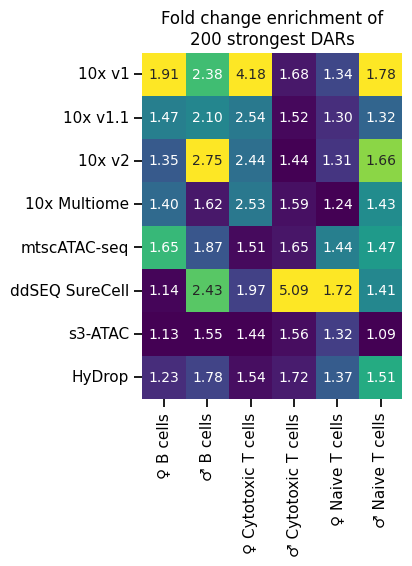

In [42]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
sns.heatmap(
    data=df_merged_pivot_abs_normalized.fillna(value=0),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)
# plt.xticks(rotation=45, ha="right")

# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
plt.title("Fold change enrichment of\n200 strongest DARs")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_top200_DARs_fc_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_top200_DARs_fc_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# n_DARs

In [43]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]

In [44]:
df_lens = df_lens.loc[tech_order]

df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

df_lens.columns = [male_female_alias_dict[x] for x in df_lens.columns]
df_lens = df_lens[male_female_order]

df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))

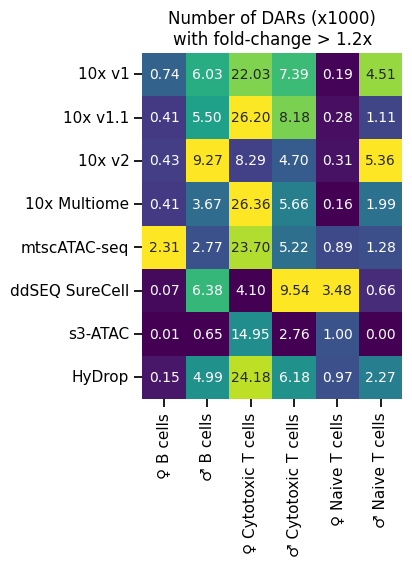

In [45]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
sns.heatmap(
    data=df_lens_normalized.fillna(value=int(0)),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=(df_lens / 1000).fillna(value=int(0)),
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)


# plt.xticks(rotation=45, ha="right")
plt.title("Number of DARs (x1000)\nwith fold-change > 1.2x")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_ndars_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_ndars_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)